In [40]:
%%html
<style>
.CodeMirror { width: 100vw; }
.prompt  { visibility: hidden; width: 0px !important; }
.prompt_container { visibility: hidden; width: 0px !important; }
.container {  width: 95% !important; }
.rendered_html { font-size:0.8em; }
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td { font-size: 100%;}
td { font-size: 16px }
</style>

# CS 121 Lecture 5 : Syntactic sugar and computing every function

In [ ]:
# utility code 
%run "Utilities.ipynb"
from IPython.display import clear_output
clear_output()

In [ ]:
def AND(a,b): return a*b

def OR(a,b): return 1 if a+b else 0

def NOT(a): return 1-a

In [ ]:
def IF(cond,a,b):
    notcond = NAND(cond,cond)
    temp = NAND(b,notcond)
    temp1 = NAND(a,cond)
    return NAND(temp,temp1)
mystery = circuit2prog(circuit(IF))

gate_0 = NAND(X[0],X[0])
gate_1 = NAND(X[2],gate_0)
gate_2 = NAND(X[1],X[0])
Y[0] = NAND(gate_1,gate_2)



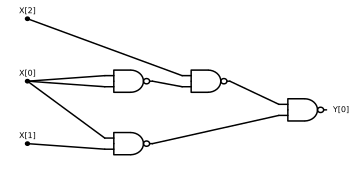

In [39]:
# What function does the following NAND-CIRC program compute?
print(mystery)
circuit(mystery)

In [41]:
table(mystery)

_Input_ | _Output_
--------|---------
  $000$  | $0$ 
  $001$  | $1$ 
  $010$  | $0$ 
  $011$  | $1$ 
  $100$  | $0$ 
  $101$  | $0$ 
  $110$  | $1$ 
  $111$  | $1$ 


__Theorem:__ Let NAND-CIRC++ be the language that has on 
top of NAND-CIRC the following construct:
```Python
if (cond) {
    do something
}``` 
then for every $f:\{0,1\}^n \rightarrow \{0,1\}^m$, if $f$ is computable by a NAND-CIRC++ program, then $f$ 
is computable by a NAND-CIRC program.

__Proof:__ First, can use `foo = IF(cond,bar,blah)` since we can compute `IF`. <br>
Transform a line `foo = NAND(bar,blah)` in `do something` to
```Python
temp = NAND(bar,blah)
foo  = IF(cond,temp,foo)
```

## The lookup function

We define $LOOKUP_\ell(x,i)=x_i$ where $x\in \{0,1\}^{2^\ell}$ and  $i\in \{0,1\}^\ell$.

$$LOOKUP_1(x_0,x_1,i_0) = x_{i_0}$$

$$LOOKUP_2(x_0,x_1,x_2,x_3,i_0,i_1) = x_{i_0 i_1} = 
\begin{cases}x_0, & i_0=0,i_1 =0 \\ x_1, & i_0=0,i_1=1 \\
x_2, & i_0 =1, i_1 =0 \\
x_3, & i_0=1, i_1=1 \end{cases}
$$

__Q:__ Compute $LOOKUP_1$, $LOOKUP_2$ using NANDs or AND/OR/NOTs - you can use `IF`

In [44]:
def LOOKUP1(x_0,x_1,i_0): return IF(i_0,x_1,x_0)

In [45]:
def LOOKUP2(x_0,x_1,x_2,x_3,i_0,i_1):
    return IF(i_0,
             IF(i_1,x_3,x_2),
              IF(i_1,x_1,x_0)
             )

x_0,x_1,x_2,x_3 = 0,1,1,0
print(LOOKUP2(x_0,x_1,x_2,x_3,0,0),
      LOOKUP2(x_0,x_1,x_2,x_3,0,1),
      LOOKUP2(x_0,x_1,x_2,x_3,1,0),
      LOOKUP2(x_0,x_1,x_2,x_3,1,1))

0 1 1 0


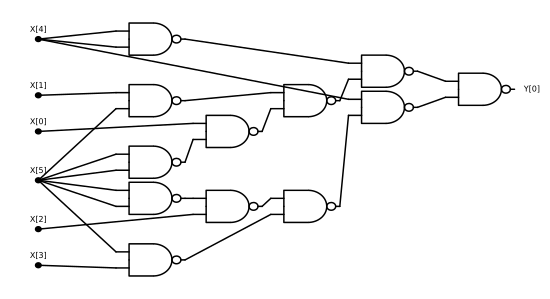

In [46]:
circuit(LOOKUP2)

In [48]:
def LOOKUP3(x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,i_0,i_1,i_2):
    return IF(i_0,
      LOOKUP2(x_4,x_5,x_6,x_7,i_1,i_2),
      LOOKUP2(x_0,x_1,x_2,x_3,i_1,i_2))
x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7 = 1,1,0,0,1,1,1,0
print(LOOKUP3(x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,0,1,0),
      LOOKUP3(x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,1,0,0),
      LOOKUP3(x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,1,1,1))

0 1 0


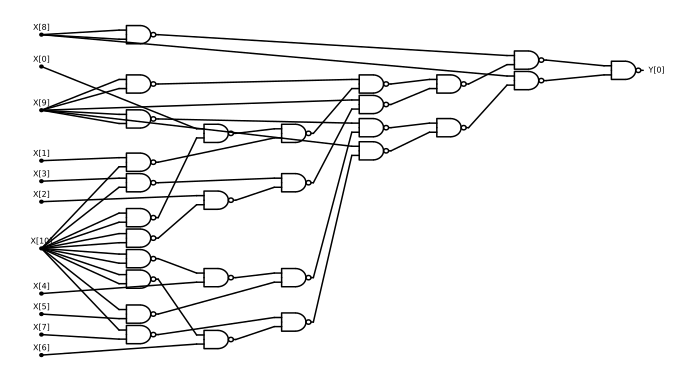

In [49]:
circuit(LOOKUP3)

__Q:__ Write a recursive equation for $LOOKUP_{\ell+1}$ in terms of $LOOKUP_{\ell}$.

$$LOOKUP_{\ell+1}(x,i) = \begin{cases} LOOKUP_\ell(x_0,\ldots,x_{2^{\ell-1}-1},i_1,\ldots,i_{\ell-1}), & i_0 = 0 \\
LOOKUP_\ell(x_{2^{\ell-1}},\ldots,x_{2^{\ell}-1},i_1,\ldots,i_{\ell-1}), & i_0 = 1  \end{cases}$$

In [50]:
print(circuit(IF).size(), circuit(LOOKUP2).size(), circuit(LOOKUP3).size())

4 12 28


__Cor:__ $size(LOOKUP_{\ell+1}) \leq 2\cdot size(LOOKUP_\ell) + 4$

__Cor:__ $LOOKUP_\ell \in SIZE(4 \cdot 2^\ell)$ for every $\ell$. <br>
$SIZE(s) := \{ f \;|\; f \text{ computable by circuit of $\leq s$ gates } \}$

<center><img src="./funcvscircs.png" width="800px" height="600px"></img></center>

![](cucumber.png)

## More syntactic sugar

__Q:__ Let $one:\{0,1\} \rightarrow \{0,1\}$ be the function $one(a)=1$ for $a\in \{0,1\}$, and let $zero:\{0,1\} \rightarrow \{0,1\}$
be function $zero(a)=0$ for $a\in \{0,1\}$. Give NAND circuits to compute $one$ and $zero$.

In [51]:
def one(a):
    return NAND(a,NAND(a,a))
def zero(a):
    b = one(a)
    return NAND(b,b)
table(one)
table(zero)

_Input_ | _Output_
--------|---------
  $0$  | $1$ 
  $1$  | $1$ 


_Input_ | _Output_
--------|---------
  $0$  | $0$ 
  $1$  | $0$ 


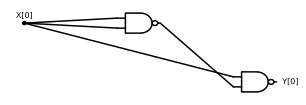

In [52]:
circuit(one)

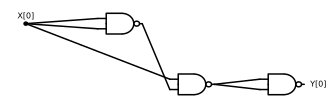

In [53]:
circuit(zero)

__Corollary:__ Can add the function `LOOKUP` and the constants `0,1` to NAND-CIRC and get equivalent power.

__Corollary:__ For every $f:\{0,1\}^\ell \rightarrow \{0,1\}$, can compute $f$ using 
a circuit of size at most $10\cdot 2^\ell$.

## Even more  sugar

Define NAND-CIRC-PROC to be NAND-CIRC + procedure defining code

Then can transform every NAND-CIRC-PROC program to NAND-CIRC program

In [ ]:
import re

In [ ]:
def strip_empty_lines(code):
    lines = [l for l in code.split('\n') if l and not l.isspace()]
    return "\n".join(lines)+"\n"

In [ ]:
def inline_proc(code, proc_name, proc_args,proc_body):
    code = strip_empty_lines(code)
    arglist = ",".join([r"([a-zA-Z0-9\_\[\]]+)" for i in range(len(proc_args))])
    regexp = fr'([a-zA-Z0-9\_\[\]]+)\s*=\s*{proc_name}\({arglist}\)\s*$'
    #  captures "variable = func_name(arguments)"    
    while True:
        m = re.search(regexp, code, re.MULTILINE)
        if not m: break
        newcode = proc_body 
        for i in range(len(proc_args)): 
            newcode = newcode.replace(proc_args[i], m.group(i+2))
        newcode = newcode.replace('return', m.group(1) + " = ")
        code = code[:m.start()] + newcode + code[m.end()+1:]
    return code

In [ ]:
blah =  r'''temp = NAND(a,b)
return NAND(b,c)
'''

code = r'''
z = blah(x,y)
w = blah(z,x)
'''

print(inline_proc(code,"blah",['a','b'],blah))

In [ ]:
def parse_procs(code):
    """Parse code that contain procedure definitions into a list of
    triples (name, arguments, body)"""
    code = strip_empty_lines(code)
    lines = code.split('\n') 
    regexp = r'def\s+([a-zA-Z\_0-9]+)\(([\sa-zA-Z0-9\_,]+)\)\s*:\s*'
    procs = []
    current_line = 0
    rest = ""
    while current_line < len(lines):
        m = re.match(regexp,lines[current_line])
        if m: 
            current_line+= 1
            code = ""
            while current_line < len(lines) and lines[current_line][0]==' ':
                code += lines[current_line].strip()+'\n'
                current_line += 1
            procs.append((m.group(1) , m.group(2).split(','), code))
        else:
            rest += lines[current_line]+'\n'
            current_line += 1
    return rest, procs

In [ ]:
def desugar(code):
    code, procs = parse_procs(code)
    for name,args,body in reversed(procs):
        code = inline_proc(code,name,args,body)
    return code

In [54]:
# What does this do?
sweetcode = r'''
def NOT(a): 
    return NAND(a,a)
    
def AND(a,b):
    temp = NAND(a,b) 
    return NOT(temp)

def OR(a,b):
    temp1 = NOT(a)
    temp2 = NOT(b) 
    return NAND(temp1,temp2)

and1 = AND(X[0],X[1])
and2 = AND(X[0],X[2])
and3 = AND(X[1],X[2])
or1  = OR(and1,and2)
Y[0] = OR(or1,and3)
'''

In [55]:
sugarfree  =  desugar(sweetcode)
table(sugarfree)

_Input_ | _Output_
--------|---------
  $000$  | $0$ 
  $001$  | $0$ 
  $010$  | $0$ 
  $011$  | $1$ 
  $100$  | $0$ 
  $101$  | $1$ 
  $110$  | $1$ 
  $111$  | $1$ 


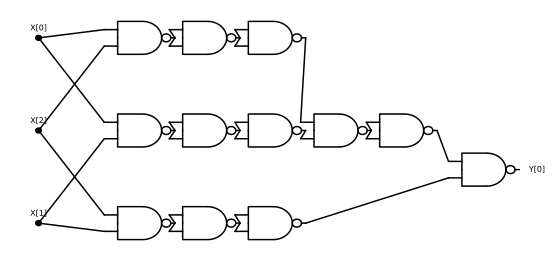

In [56]:
circuit(sugarfree)

In [57]:
print(sugarfree)

temp = NAND(X[0],X[1])
and1 =  NAND(temp,temp)
temp = NAND(X[0],X[2])
and2 =  NAND(temp,temp)
temp = NAND(X[1],X[2])
and3 =  NAND(temp,temp)
temp1 =  NAND(and1,and1)
temp2 =  NAND(and2,and2)
or1 =  NAND(temp1,temp2)
temp1 =  NAND(or1,or1)
temp2 =  NAND(and3,and3)
Y[0] =  NAND(temp1,temp2)



## Sugar all the way 

In [ ]:
def NOT(a): return NAND(a,a)
def AND(a,b): return NOT(NAND(a,b))
def OR(a,b): return NAND(NOT(a),NOT(b))

In [ ]:
GLOBAL_NANDONLY = True

In [ ]:
def MAJ(a,b,c):
    u = NAND(a,b)
    v = NAND(a,c)
    w = NAND(b,c)
    z = NAND(u,v)
    return NAND(w,NOT(z))

In [ ]:
def XOR(a,b):
    u = NAND(a,b)
    v = NAND(a,u)
    w = NAND(b,u)
    return NAND(v,w)

def XOR3(a,b,c):
    return XOR(XOR(a,b),c)

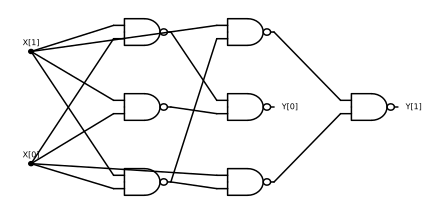

In [58]:
def ADD1(a,b):
    return AND(a,b),XOR(a,b)

circuit(ADD1)

<center><img src="nandgame.png" width ="1000" height ="800"></img></center>

In [59]:
def addnumbers(X,Y):
    n = len(X)
    Z = [0]*(n+1)
    carry = zero(X[0])
    for i in range(n-1,-1,-1):
        Z[i+1] = XOR3(X[i],Y[i],carry)
        carry = MAJ(carry,X[i],Y[i])
    Z[0] = carry
    return Z

addnumbers([1,1],[1,1])

[1, 1, 0]

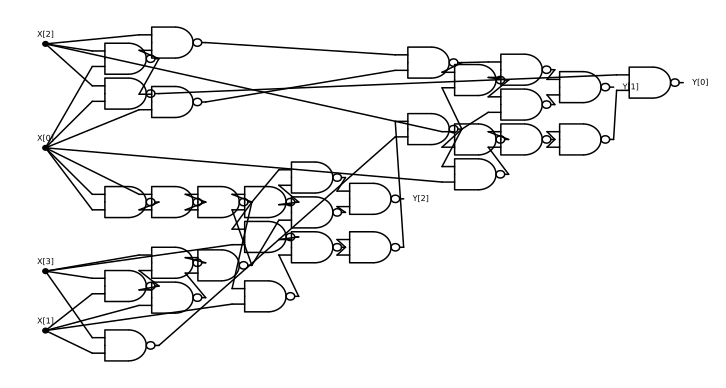

In [60]:
add2circ = circuit(addnumbers,2,2)
add2circ

In [ ]:
table(add2circ)

In [ ]:
add2circ.size()

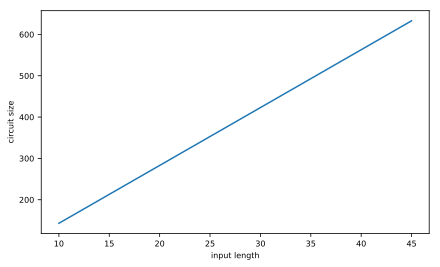

In [61]:
X = list(range(10,50,5))
Y = [circuit(addnumbers,n,n).size() for n in X]
import matplotlib.pyplot as plt
plt.plot(X,Y)
plt.ylabel('circuit size')
plt.xlabel('input length')
plt.show()